In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from scipy.stats import skew
from scipy.stats import boxcox

In [17]:
data= pd.read_csv("academic_perf.csv")
print(data)

    StudentID     Name   Age   Gender  MathScore  ScienceScore  EnglishScore  \
0           1    Alice  20.0   Female       85.0            88          82.0   
1           2      Bob   NaN     Male        NaN            75          85.0   
2           3  Charlie  22.0   Female       90.0            92          90.0   
3           4    David  21.0     Male       95.0            80          92.0   
4           5      Eve  20.0  Unknown       80.0            79          78.0   
5           6    Frank   NaN     Male      110.0            90          89.0   
6           7    Grace  22.0   Female       85.0            86          94.0   
7           8   Hannah  21.0     Male       -5.0            91          85.0   
8           9      Ivy  19.0   Female       88.0            84          88.0   
9          10     Jack  25.0     Male        NaN            78          77.0   
10         11     Lily  23.0   Female       93.0            85          90.0   
11         12     Mike  18.0     Male   

In [19]:
df = pd.DataFrame(data)

In [21]:
#missing values
missing_values = df.isnull().sum()
print(missing_values)

StudentID       0
Name            0
Age             2
Gender          0
MathScore       3
ScienceScore    0
EnglishScore    1
Attendance      2
dtype: int64


In [23]:
#handle missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['MathScore'].fillna(df['MathScore'].mean(), inplace=True)
df['EnglishScore'].fillna(df['EnglishScore'].mean(), inplace=True)
df['ScienceScore'].fillna(df['ScienceScore'].mean(), inplace=True)
df['Attendance']= pd.to_numeric(df['Attendance'], errors='coerce') # Converting 'Attendance' Column to Numeric
df['Attendance'].fillna(df['Attendance'].mean(), inplace=True)
#Replacing 'Unknown' in the 'Gender' Column
df['Gender'] = df['Gender'].replace('Unknown', 'Female')

C:\Users\pusad\AppData\Local\Temp\ipykernel_13604\3035522545.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\pusad\AppData\Local\Temp\ipykernel_13604\3035522545.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

In [25]:
df

,StudentID,Name,Age,Gender,MathScore,ScienceScore,EnglishScore,Attendance
0,1,Alice,20.0,Female,85.000000,88,82.000000,95.000000
1,2,Bob,21.5,Male,80.235294,75,85.000000,80.000000
2,3,Charlie,22.0,Female,90.000000,92,90.000000,85.000000
3,4,David,21.0,Male,95.000000,80,92.000000,87.333333
4,5,Eve,20.0,Female,80.000000,79,78.000000,88.000000
5,6,Frank,21.5,Male,110.000000,90,89.000000,92.000000
6,7,Grace,22.0,Female,85.000000,86,94.000000,87.333333
7,8,Hannah,21.0,Male,-5.000000,91,85.000000,95.000000
8,9,Ivy,19.0,Female,88.000000,84,88.000000,80.000000
9,10,Jack,25.0,Male,80.235294,78,77.000000,100.000000


In [27]:
#missing values
missing_values = df.isnull().sum()
print(missing_values)

StudentID       0
Name            0
Age             0
Gender          0
MathScore       0
ScienceScore    0
EnglishScore    0
Attendance      0
dtype: int64


## Scan all numeric variables for outliers. If there are outliers, use any of the suitable techniques to deal with them. 

In [44]:
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IOR = Q3-Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

In [56]:
outliers_math = detect_outliers(df,'MathScore')
print(outliers_math)
outliers_science = detect_outliers(df,'ScienceScore')
print(outliers_science)
outliers_english = detect_outliers(df,'EnglishScore')
print(outliers_english)

Empty DataFrame
Columns: [StudentID, Name, Age, Gender, MathScore, ScienceScore, EnglishScore, Attendance]
Index: []
Empty DataFrame
Columns: [StudentID, Name, Age, Gender, MathScore, ScienceScore, EnglishScore, Attendance]
Index: []
Empty DataFrame
Columns: [StudentID, Name, Age, Gender, MathScore, ScienceScore, EnglishScore, Attendance]
Index: []


In [48]:
for col in ['MathScore']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1  # Calculate IQR
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Capping the outliers
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

In [50]:
print("\nDataset After Handling Outliers:")
print(df)


Dataset After Handling Outliers:
    StudentID     Name   Age  Gender   MathScore  ScienceScore  EnglishScore  \
0           1    Alice  20.0  Female   85.000000            88     82.000000   
1           2      Bob  21.5    Male   80.235294            75     85.000000   
2           3  Charlie  22.0  Female   90.000000            92     90.000000   
3           4    David  21.0    Male   95.000000            80     92.000000   
4           5      Eve  20.0  Female   80.000000            79     78.000000   
5           6    Frank  21.5    Male  108.000000            90     89.000000   
6           7    Grace  22.0  Female   85.000000            86     94.000000   
7           8   Hannah  21.0    Male   62.000000            91     85.000000   
8           9      Ivy  19.0  Female   88.000000            84     88.000000   
9          10     Jack  25.0    Male   80.235294            78     77.000000   
10         11     Lily  23.0  Female   93.000000            85     90.000000   
11    

In [52]:
outliers_math = detect_outliers(df,'MathScore')
outliers_math

,StudentID,Name,Age,Gender,MathScore,ScienceScore,EnglishScore,Attendance


Skewness before Log Transformation: -1.1639932056541822
Skewness after Log Transformation: -1.5785021951155833


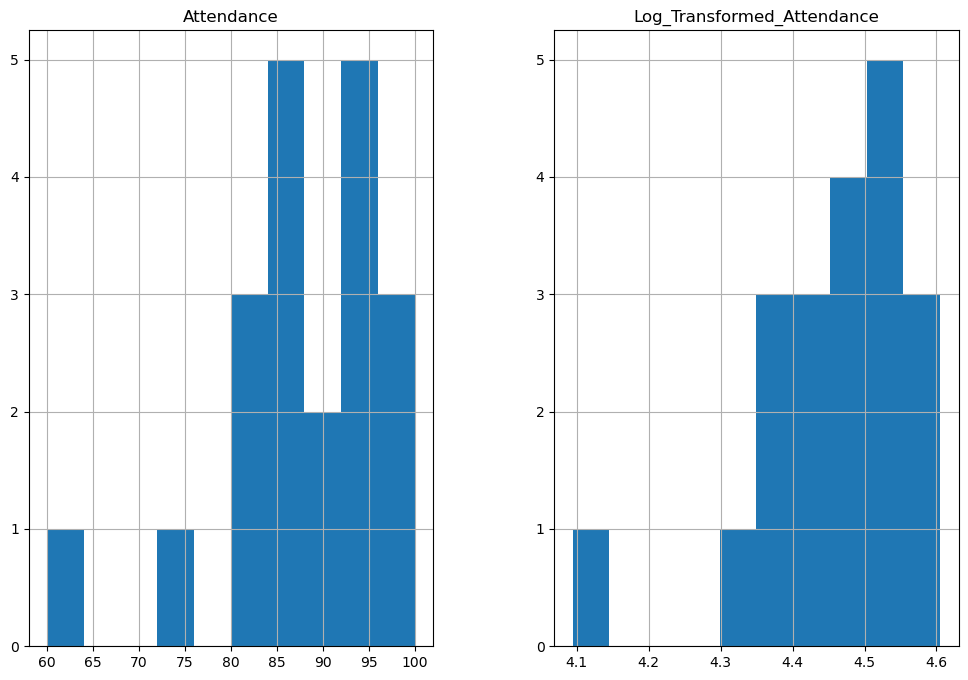

In [61]:
# Log Transformation (to reduce skewness)
df['Log_Transformed_Attendance'] = np.log(df['Attendance'])

# Check skewness before and after transformation
print("Skewness before Log Transformation:", skew(df['Attendance']))
print("Skewness after Log Transformation:", skew(df['Log_Transformed_Attendance']))

# Plotting histograms to visualize the effect of transformation
import matplotlib.pyplot as plt
df[['Attendance', 'Log_Transformed_Attendance']].hist(bins=10, figsize=(12, 8))
plt.show()
